In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

In [3]:
from Scripts import simulation_CLI as cleo

In [4]:
N = 8
num_chunks = 2
num_iterations = 50
measurments = [measure.mutual_information_of_every_pair]
measurments = [measure.relative_entropy_of_every_pair]

initial_pops = [.2 for _ in range(N)]
initial_pops[4] = .4


In [4]:
identity = DM.Identity(DM.energy_basis(4))

In [5]:
for unitary_seed in range(100):
    initial_pops = [.2, .2, .2, .2, .4, .2, .2, .2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c6"
    unitary_energy_subspace = None
    ordering_seed = 1
    chunk_size = 4
    order_rule_name = "greedy"
    num_steps = 50
    data = cleo.execute(file_name="greedy",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_0-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_0-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_1-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_1-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_2-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_2-order_rul

simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_24-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_25-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_25-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_26-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_26-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_27-ord

90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_49-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_49-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_50-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_50-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_51-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_51-ord

simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_73-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_74-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_74-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_75-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_75-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_76-ord

90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_98-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_98-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_99-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_99-order_rule_name_greedy


In [6]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [7]:
for unitary_seed in range(100):
    initial_pops = [.2, .2, .2, .2, .4, .2, .2, .2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c6"
    unitary_energy_subspace = None
    ordering_seed = 1
    chunk_size = 4
    order_rule_name = "random"
    num_steps = 50
    data = cleo.execute(file_name="random",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_0-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_0-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_1-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_1-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_2-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_2-order_rul

simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_24-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_25-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_25-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_26-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_26-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_27-ord

90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_49-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_49-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_50-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_50-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_51-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_51-ord

simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_73-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_74-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_74-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_75-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_75-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_76-ord

90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_98-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_98-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_99-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c6_connectivity-unitary_energy_subspace_None-unitary_seed_99-order_rule_name_random


In [8]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [9]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

In [12]:
data

({0: {0: 0.19999999,
   1: 0.19999999,
   2: 0.19999999,
   3: 0.19999999,
   4: 0.39999998,
   5: 0.19999999,
   6: 0.19999999,
   7: 0.19999999},
  1: {0: 0.19999999,
   1: 0.24847686,
   2: 0.19999999,
   3: 0.19999999,
   4: 0.35152316,
   5: 0.19999999,
   6: 0.19999999,
   7: 0.19999999},
  2: {0: 0.21175003,
   1: 0.23672682,
   2: 0.19999999,
   3: 0.19999999,
   4: 0.31479627,
   5: 0.23672685,
   6: 0.19999997,
   7: 0.19999999},
  3: {0: 0.22414783,
   1: 0.22432902,
   2: 0.2,
   3: 0.2,
   4: 0.27604473,
   5: 0.27547836,
   6: 0.19999999,
   7: 0.19999999},
  4: {0: 0.21308127,
   1: 0.23539557,
   2: 0.19999999,
   3: 0.19999999,
   4: 0.31063527,
   5: 0.24088787,
   6: 0.19999999,
   7: 0.19999999},
  5: {0: 0.20007339,
   1: 0.24840346,
   2: 0.19999999,
   3: 0.2,
   4: 0.35129374,
   5: 0.20022938,
   6: 0.19999999,
   7: 0.19999999},
  6: {0: 0.21042283,
   1: 0.238054,
   2: 0.19999999,
   3: 0.2,
   4: 0.31894466,
   5: 0.23257843,
   6: 0.19999999,
   7: 0.19999

In [13]:
pops_list=list(data[0].values())
pops_list_list=[]
for i in range(99):
    pops_list_list.append(list(pops_list[i].values()))
pops_list_list

[[0.19999999,
  0.19999999,
  0.19999999,
  0.19999999,
  0.39999998,
  0.19999999,
  0.19999999,
  0.19999999],
 [0.19999999,
  0.24847686,
  0.19999999,
  0.19999999,
  0.35152316,
  0.19999999,
  0.19999999,
  0.19999999],
 [0.21175003,
  0.23672682,
  0.19999999,
  0.19999999,
  0.31479627,
  0.23672685,
  0.19999997,
  0.19999999],
 [0.22414783,
  0.22432902,
  0.2,
  0.2,
  0.27604473,
  0.27547836,
  0.19999999,
  0.19999999],
 [0.21308127,
  0.23539557,
  0.19999999,
  0.19999999,
  0.31063527,
  0.24088787,
  0.19999999,
  0.19999999],
 [0.20007339,
  0.24840346,
  0.19999999,
  0.2,
  0.35129374,
  0.20022938,
  0.19999999,
  0.19999999],
 [0.21042283,
  0.238054,
  0.19999999,
  0.2,
  0.31894466,
  0.23257843,
  0.19999999,
  0.19999999],
 [0.22400126,
  0.22447555,
  0.2,
  0.19999999,
  0.27650282,
  0.2750203,
  0.19999999,
  0.19999999],
 [0.21440037,
  0.23407644,
  0.19999999,
  0.19999999,
  0.3065121,
  0.24501097,
  0.19999999,
  0.19999999],
 [0.20029265,
  0.2481

In [10]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [11]:
newdata1 = dict(h5py.File("../data/greedy/greedy.hdf5"))

In [12]:
newdata2 =  dict(h5py.File("../data/random/random.hdf5"))

In [13]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace None']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace None'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k):dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace None']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace None'][f'unitary seed {seed}'][f'order rule name {order_rule_name}']['two_qubit_dms'])
        dat = {int(k):dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [14]:
popsgreedy = get_pops(newdata1,8,"c6","greedy")

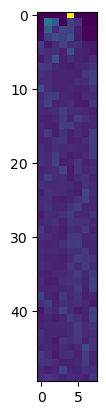

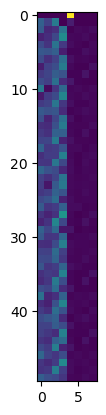

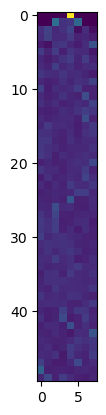

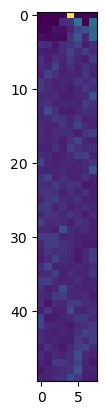

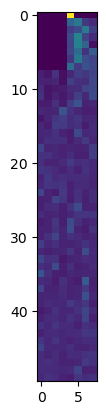

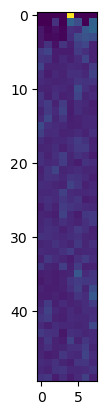

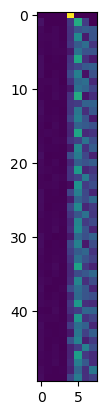

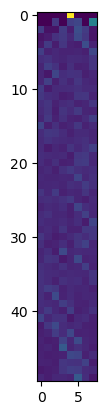

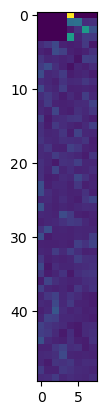

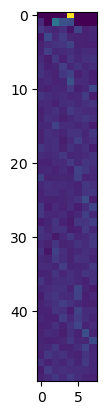

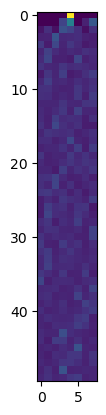

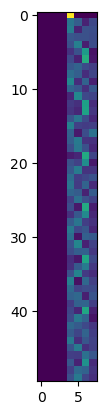

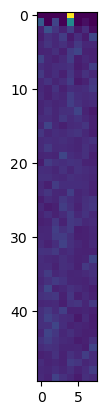

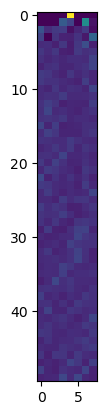

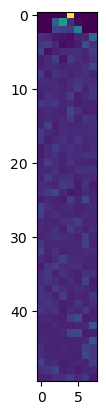

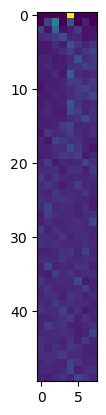

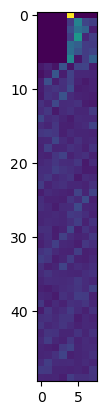

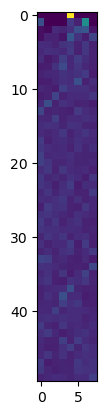

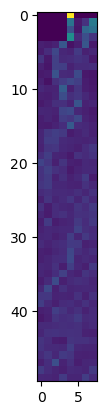

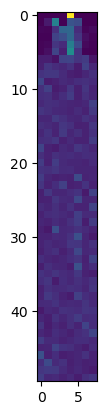

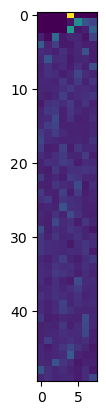

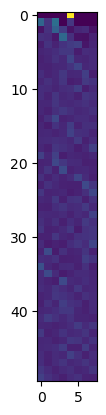

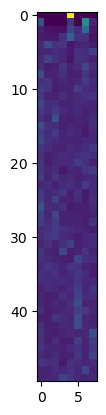

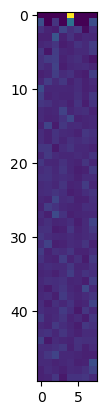

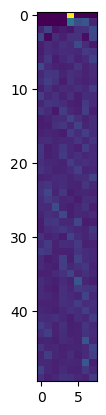

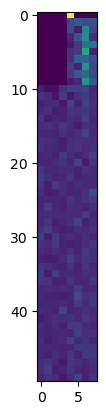

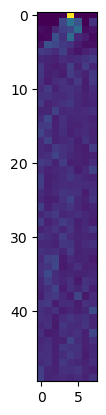

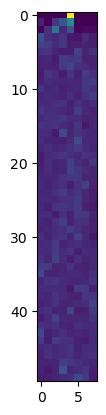

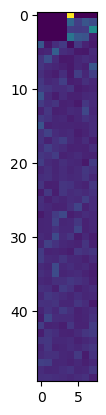

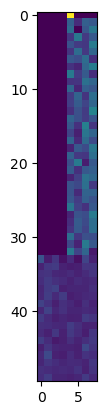

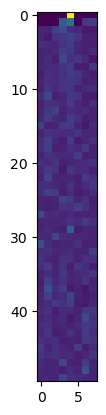

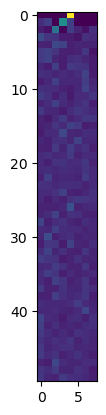

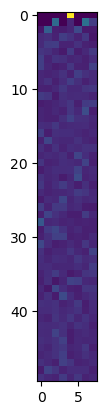

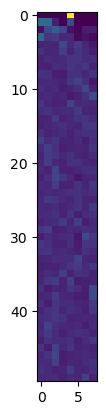

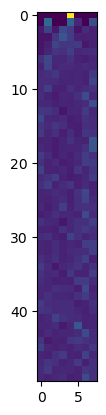

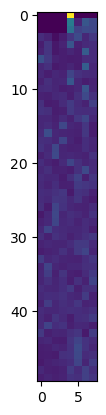

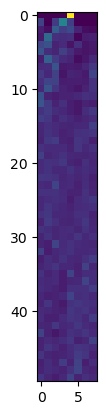

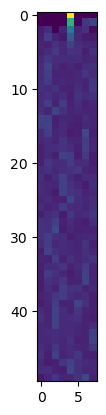

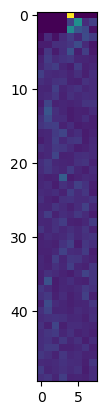

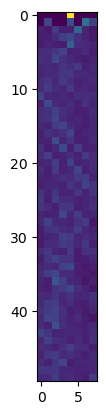

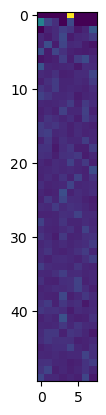

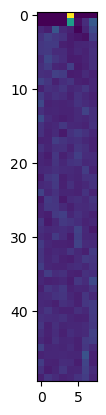

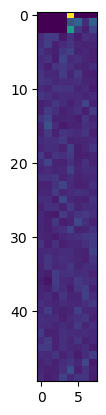

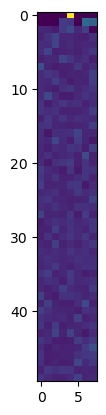

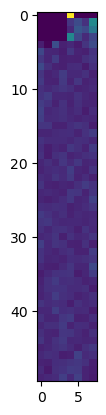

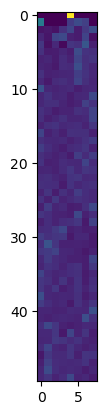

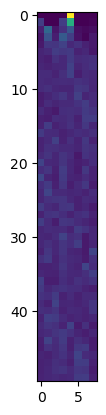

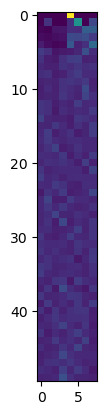

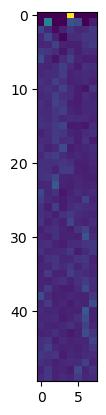

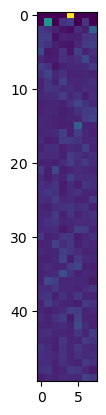

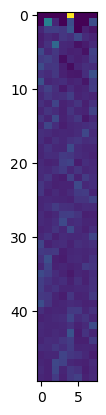

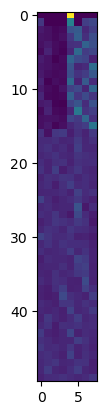

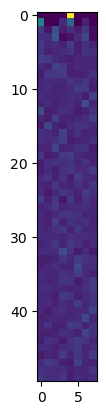

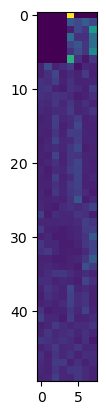

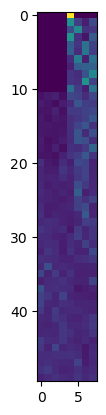

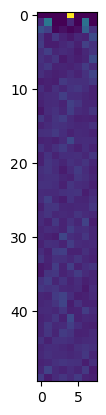

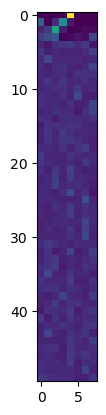

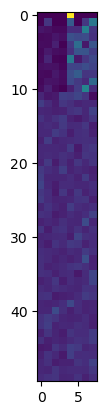

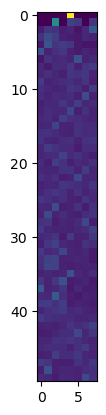

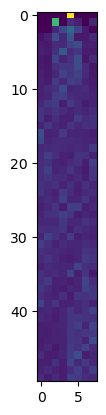

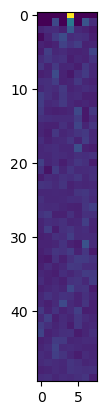

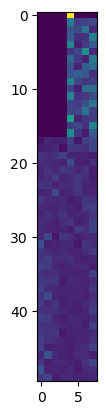

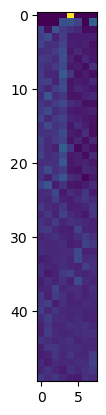

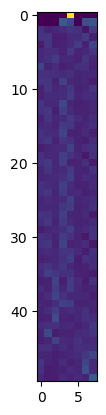

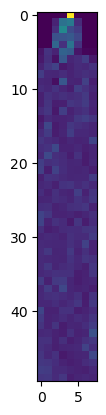

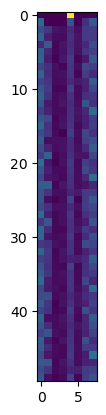

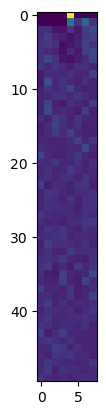

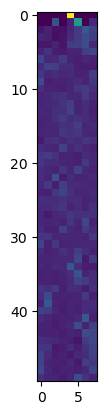

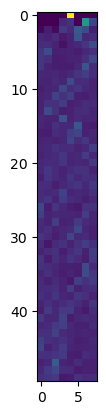

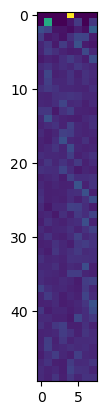

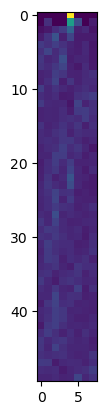

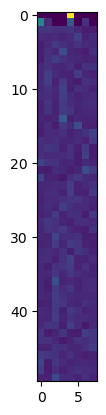

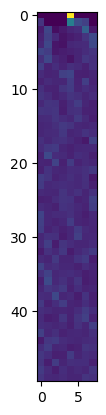

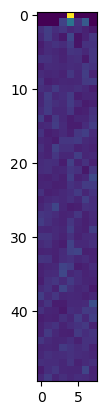

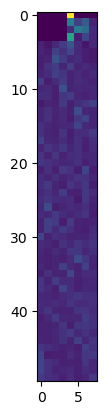

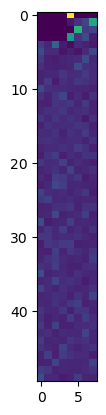

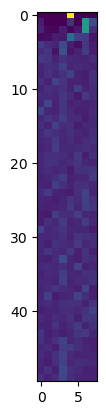

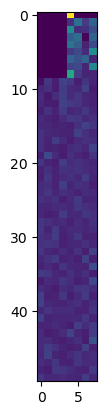

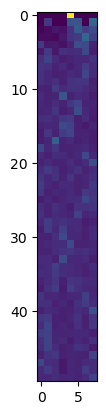

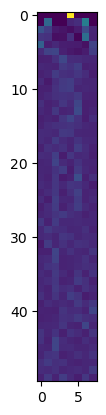

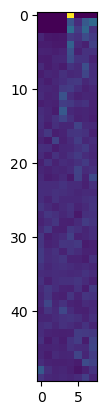

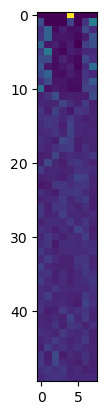

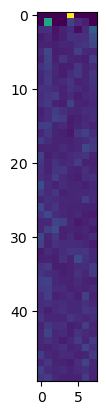

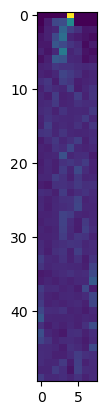

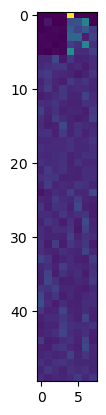

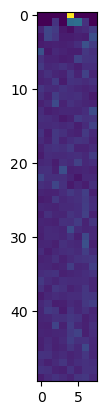

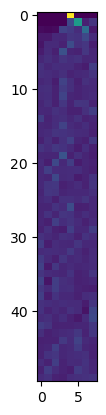

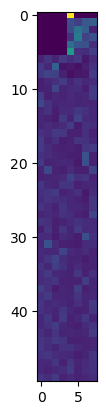

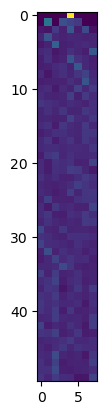

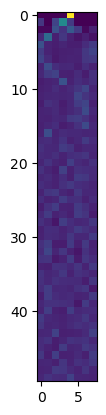

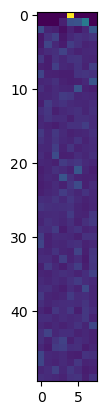

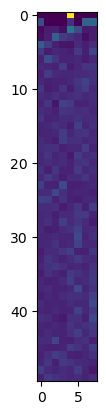

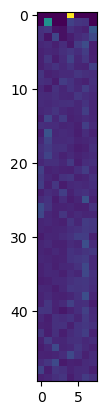

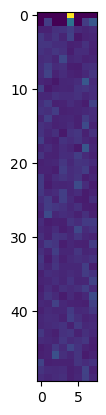

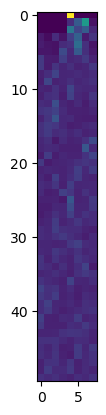

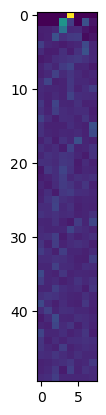

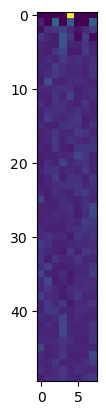

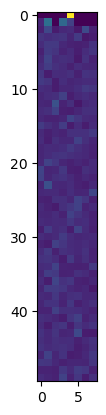

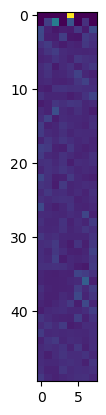

In [15]:
for i in range(99):
    plt.imshow(popsgreedy[i], interpolation='none')
    plt.show()

In [18]:
for i in range(99):
    plt.imshow(popsgreedy[i], interpolation='none')
    plt.savefig(f'plotnumgreedy_{i}.png')   # save the figure to file
    plt.close() 

In [16]:
popsrandom =  get_pops(newdata2,8,"c6","random")

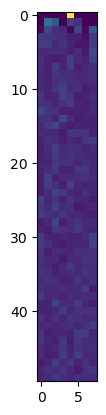

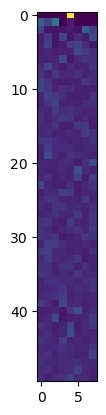

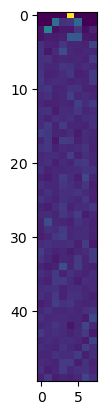

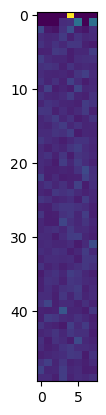

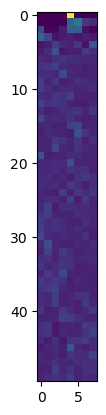

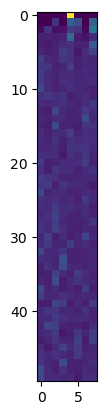

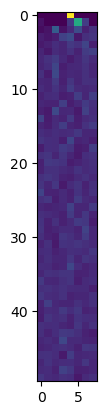

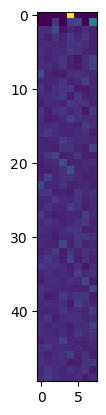

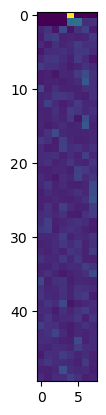

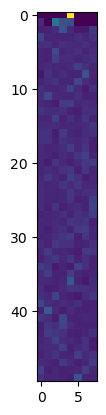

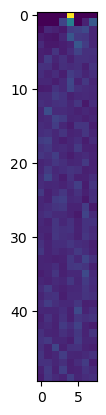

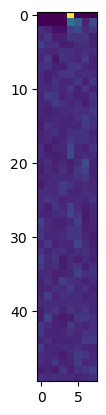

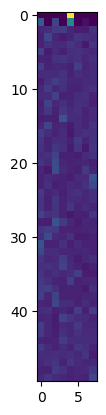

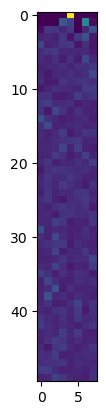

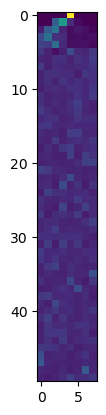

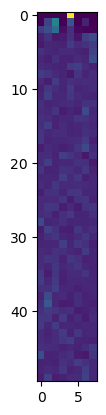

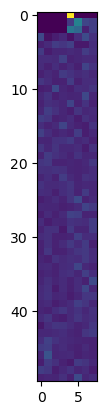

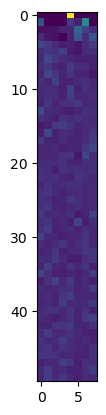

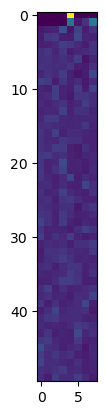

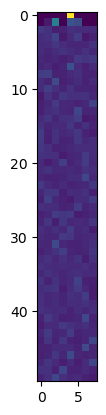

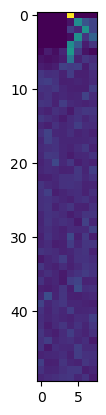

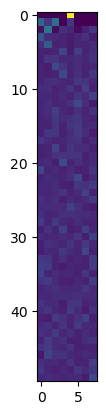

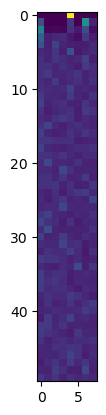

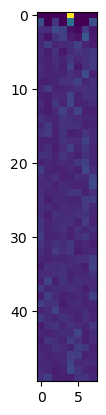

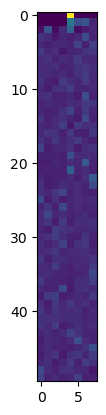

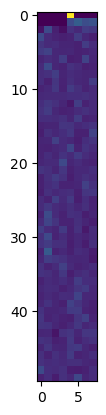

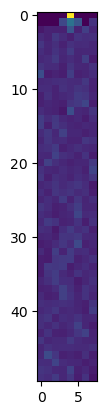

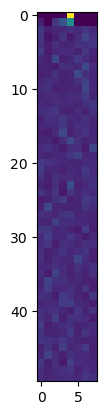

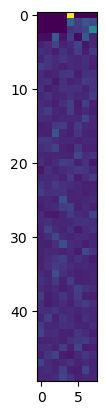

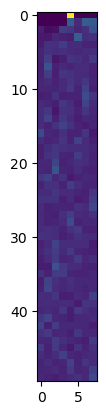

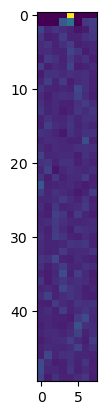

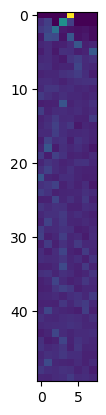

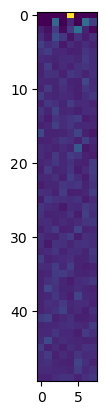

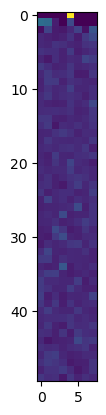

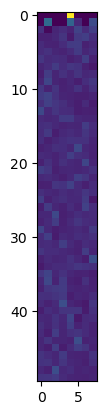

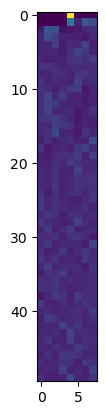

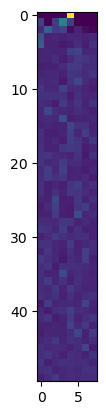

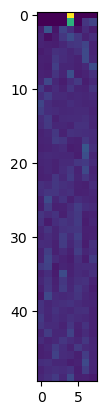

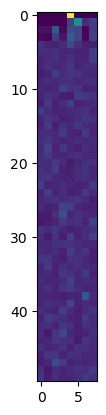

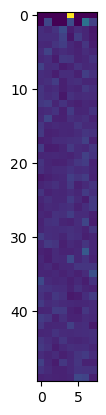

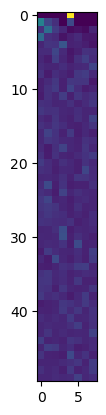

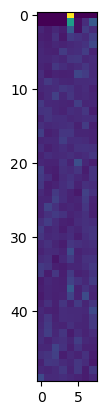

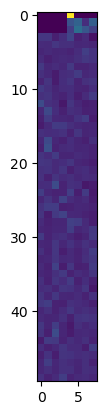

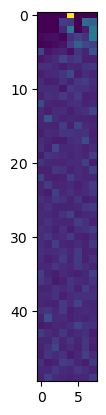

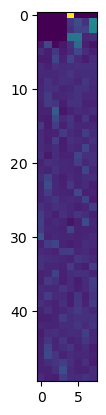

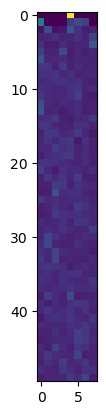

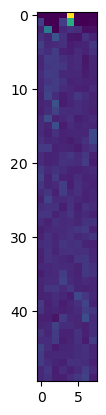

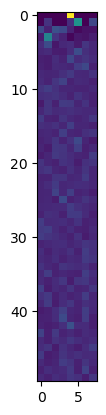

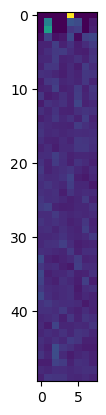

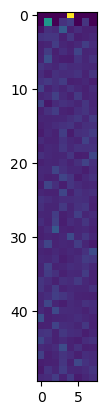

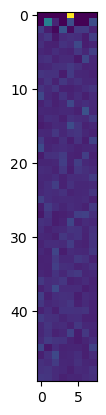

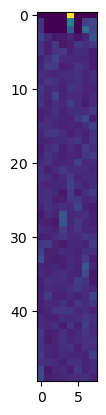

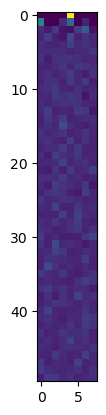

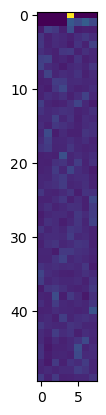

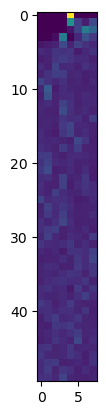

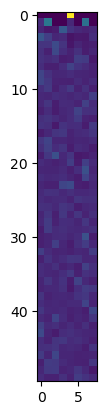

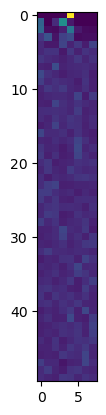

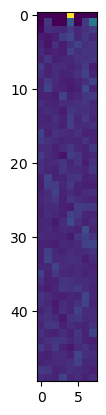

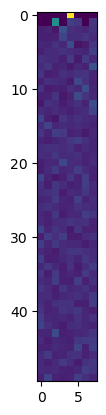

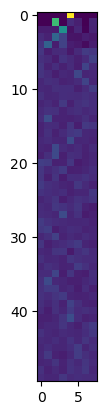

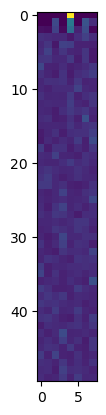

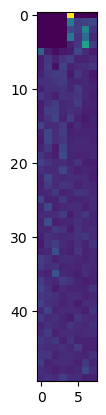

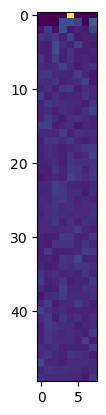

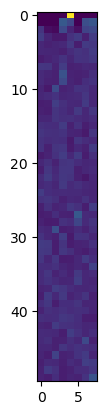

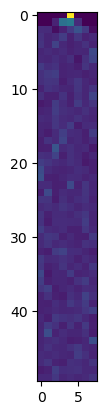

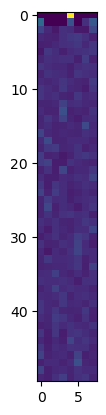

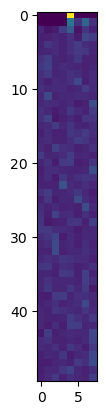

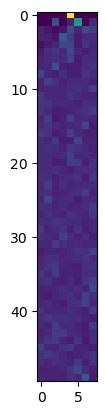

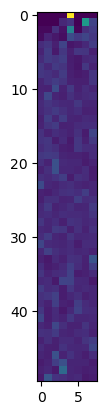

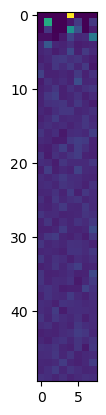

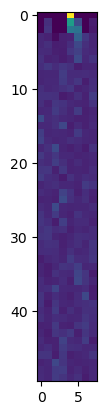

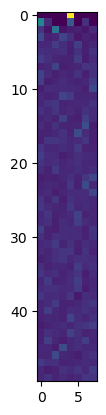

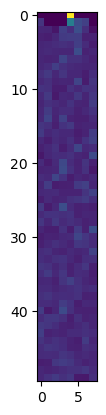

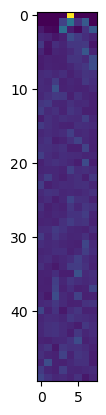

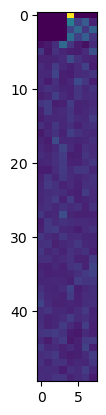

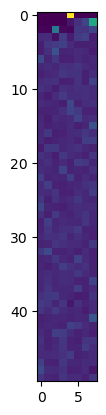

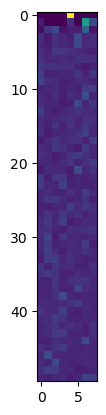

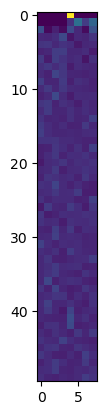

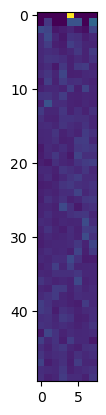

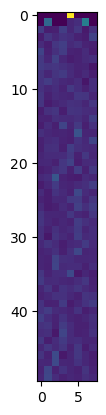

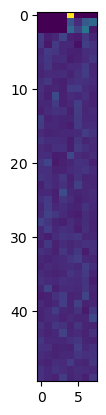

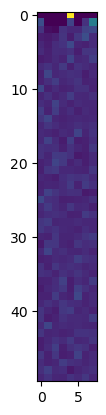

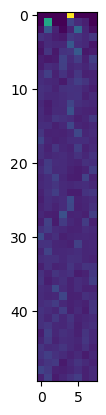

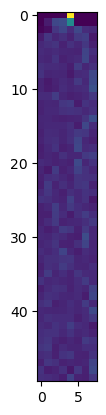

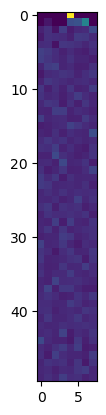

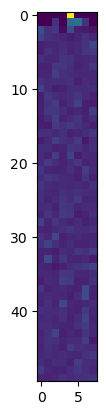

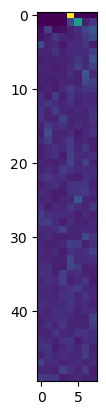

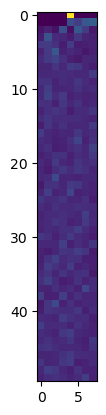

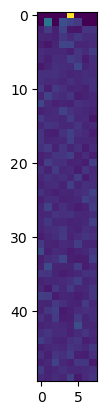

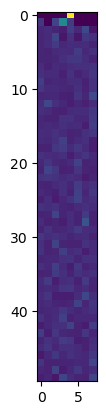

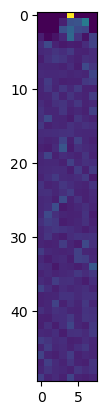

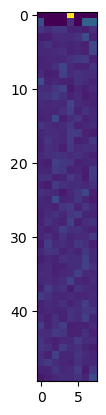

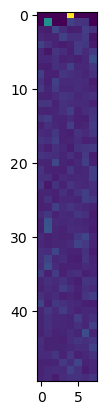

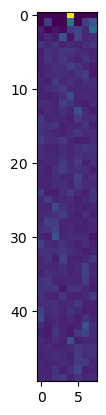

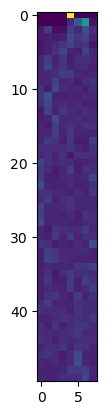

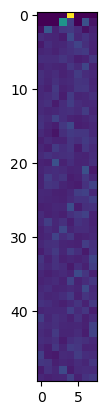

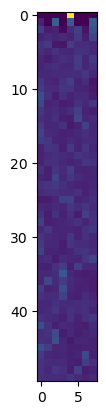

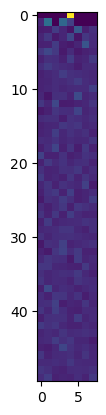

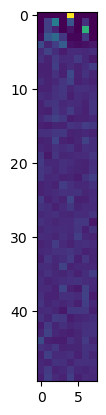

In [17]:
for i in range(99):
    plt.imshow(popsrandom[i], interpolation='none')
    plt.show()

In [19]:
for i in range(99):
    plt.imshow(popsrandom[i], interpolation='none')
    plt.savefig(f'plotnumrandom_{i}.png')   # save the figure to file
    plt.close() 

In [26]:
sizes = [8]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in data1[f'{size} qubits']:
        print(f'{size} qubits {connectivity}')
        pops = get_pops(newdata1,size,connectivity,[:-13])
        extractable_work = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work = np.diff(extractable_work,axis = 1)
        hot__percent_greater_0 = np.mean(change_in_ex_work[:,:,(0,4)]>0,axis = 1).flatten()
        cold_percent_greater_0 = np.mean(change_in_ex_work[:,:,(1,2,3,5,6,7)]>0,axis = 1).flatten()
        result[size]['hot'][connectivity] = hot__percent_greater_0
        result[size]['cold'][connectivity] = cold_percent_greater_0

8 qubits c5 connectivity


KeyError: "Unable to open object (object 'order rule name greedy' doesn't exist)"

In [25]:
data1

{'8 qubits': <HDF5 group "/8 qubits" (1 members)>}